# Learning outcomes
1. image histogram
2. histogram equalization
    * purpose:contrast enhancement (same effect as simple scalar multiplication)
3. thresholding (end results: binary mask with 255 as foreground)
4. morphologicl operations (manipulate the mask)
    - Erosian
    - Dilation
    - Opening
    - Closing
5. color spaces: RGB,HSV and L\*a\*b
6. color based segmentation (HSV). hue represents color, one channel encode color information

# Setup

In [2]:
import sys
assert sys.version_info >=(3,7)
import cv2 as cv
import numpy as np
from util_func import *
import matplotlib.pyplot as plt


# image histogram

In [3]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
%timeit hist = cv.calcHist([gray],[0],None,[256],[0,256])
%timeit hist ,_= np.histogram(gray.flatten(),256)

40.5 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.05 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


32 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


NameError: name 'hist' is not defined

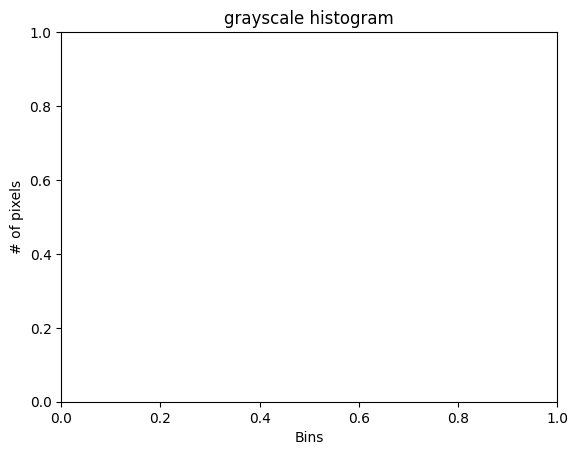

In [5]:
%timeit hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title('grayscale histogram')
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.show()

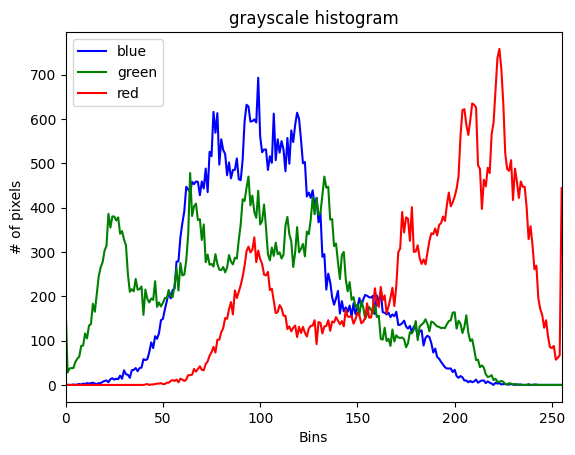

In [6]:
channels = cv.split(img)
colors = ("blue","green","red")

plt.figure()
plt.title('grayscale histogram')
plt.xlabel("Bins")
plt.ylabel("# of pixels")

for ch, color in zip(channels,colors):
    hist = cv.calcHist([ch],[0],None,[256],[0,256])
    plt.plot(hist, color=color, label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

# HIstogram equalization

In [7]:
img = cv.imread("images/low_contrast_img.jfif",0)
show_img("low_contrast_img",img)

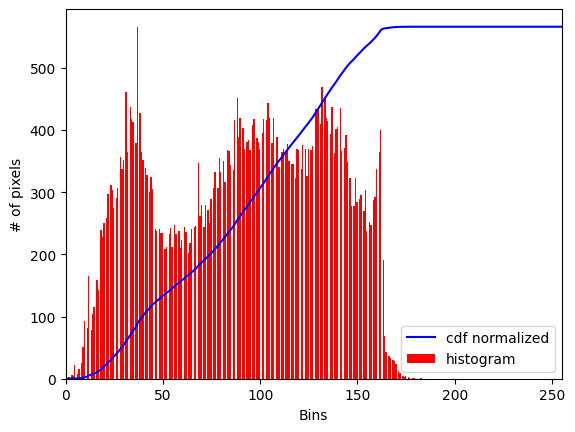

In [8]:
hist = cv.calcHist([img],[0],None,[256],[0,256])
    
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color="b")
plt.hist(img.flatten(),256,color="r")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.xlim([0,255])
plt.legend(("cdf normalized", "histogram"))
plt.show()


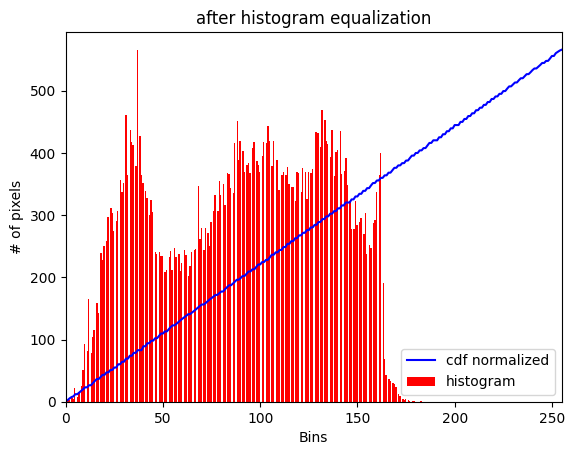

In [9]:
#histogram equalization
eq = cv.equalizeHist(img)

hist = cv.calcHist([eq],[0],None,[256],[0,256])
    
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color="b")
plt.hist(img.flatten(),256,color="r")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.xlim([0,255])
plt.legend(("cdf normalized", "histogram"))
plt.title("after histogram equalization")
plt.show()




In [10]:
cv.imshow("original",img)
show_img("equalization",eq)

In [11]:
# 
img = cv.imread("images/dog1.jfif",0)

#equalization
eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
dst = clahe.apply(img)

cv.imshow("original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)


In [12]:
#exercise 1
img = cv.imread("images/winter.jfif",0)

#equalization
eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
dst = clahe.apply(img)

cv.imshow("original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)


# Thresholding

In [13]:
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [14]:
img = np.fromfunction(lambda i,j:j,(50,256),dtype = np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    _, img2 = cv.threshold(img,x,255,cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img,x,255,cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img,x,255,cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img,x,255,cv.THRESH_TOZERO_INV)
    
    cv.imshow('window', np.vstack([img1, img2, img3, img4, img5]))
    
cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

# Comparison on the thresholding methods

In [15]:
img = cv.imread("images/noisy.jfif",0)
show_img("noisy image",img)

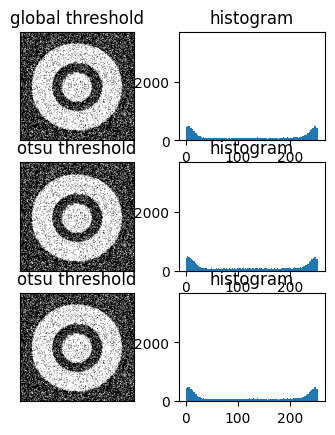

In [16]:
#apply 3 methods
#1: global threshold
th1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)[1]

#2: OTSU threshold
th2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3: global threshold
blur = cv.GaussianBlur(img,(5,5),0)
th3 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img,0,th1,
       img,0,th2,
       img,0,th3]

titles = ("original","histogram","global threshold",
         "original","histogram","otsu threshold",
         "blur","histogram","otsu threshold")

for i in range(3):
    plt.subplot(3,3,3*i+1),plt_img(imgs[3*i],title=titles[3*i])
    plt.subplot(3,3,3*i+2),plt.hist(imgs[3*i].flatten(),256)
    plt.title(titles[3*i+1])
    plt.subplot(3,3,3*i+1),plt_img(imgs[3*i+2],title=titles[3*i+2])
    
plt.show()

# morphological operation
- Erosian
- Dilation
- Opening (erosion + dilation)
- Closing

In [17]:
#define structuring element
kernel = np.ones((3,3),dtype=np.uint8)

#erosion
dilation = cv.dilate(th3, kernel, iterations=1)

#show
img_combined = np.hstack((th3,dilation))

show_img("dilate",img_combined)

In [18]:

def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while True:
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3

    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1

    kernel = np.ones((size, size), dtype=np.uint8)

    erosion = cv.erode(th3, kernel, iterations=iteration)

    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


In [19]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [20]:
#CLOSING
res = cv.morphologyEx(th3,cv.MORPH_CLOSE,kernel,iterations=2)

#show
img_combined = np.hstack((th3,res))

show_img("closing",img_combined)

# Color spaces
- RGB(the most prevalent color space. Any picture is stored under this format,
     but the down side of this color space is that there is no clear way to separate chroma(color and its saturation). Not suitable for color based segmentation.)
- HSV (Hue, Saturation, value)
    - Hue -> color (make sure of hue to segment color)
    - saturation -> purity of color
    - value -> brightnesses / luminance
- LAB
    - perceptual uniformity(the Euclidean distance in the color space corresponds to perceptual uniformity)


In [21]:
img = cv.imread("images/lena.jfif")
img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
l,a,b = cv.split(img_lab)

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
l_sharpened = cv.filter2D(l,-1,kernel)


img_lab_merge = cv.merge((l_sharpened,a,b))
dst = cv.cvtColor(img,cv.COLOR_BGR2Lab)

cv.imshow("original",img)
show_img("sharpen",img)


# demo on color based segmentation

In [22]:
img = cv.imread("images/color_space/pant.jfif")
img = cv.cvtColor(img,cv.COLOR_BGR2Lab)


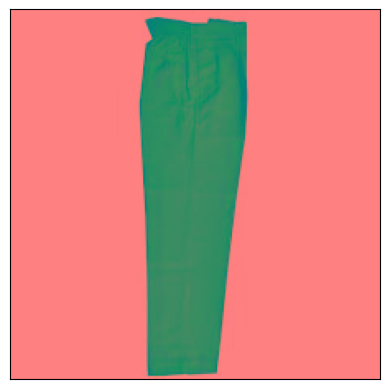

In [23]:
plt_img(img)
plt.show()

# Show the pixels in rgb color space

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


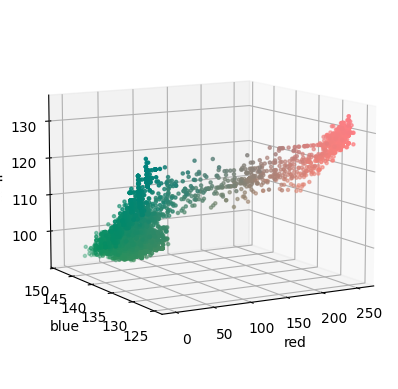

In [25]:
r,g,b = cv.split(img)
fig = plt.figure()
axes = fig.add_subplot(1,1,1,projection="3d")

pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axes.scatter(r.ravel(),g.ravel(),b.ravel(),
           facecolors=pixel_colors, marker=".")
axes.view_init(elev=10, azim=240)
axes.set_xlabel("red")
axes.set_ylabel("blue")
axes.set_zlabel("yellow")

plt.show()

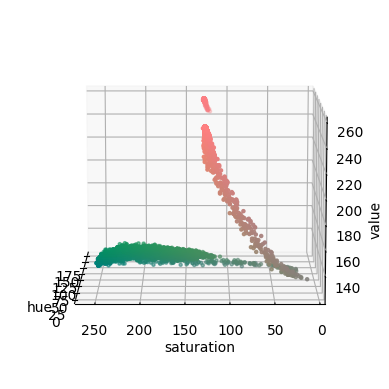

In [26]:
img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)
fig = plt.figure()
axes = fig.add_subplot(1,1,1,projection="3d")

axes.scatter(h.ravel(),s.ravel(),v.ravel(),
           facecolors=pixel_colors, marker=".")
axes.view_init(elev=10, azim=180)
axes.set_xlabel("hue")
axes.set_ylabel("saturation")
axes.set_zlabel("value")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'cv'

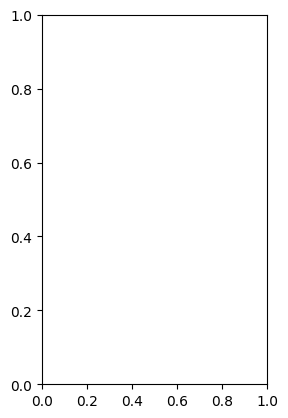

In [27]:
blue_low = (85,90,0)
blue_high = (125,255,160)

square1 = np.full((10,10,3),blue_low,dtype=np.uint8)
square2 = np.full((10,10,3),blue_high,dtype=np.uint8)

plt.subplot(121),plt_img(cv.cvtColor(square1.cv.COLOR_HSV2RGB))
plt.subplot(122),plt_img(cv.cvtColor(square2.cv.COLOR_HSV2RGB))
plt.show()

(<Axes: title={'center': 'Segmentation'}>, None)

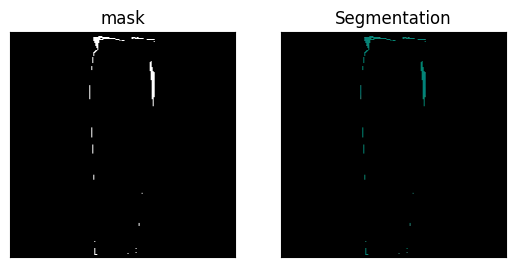

In [28]:
# color based segmentation
mask = cv.inRange(img_hsv,blue_low,blue_high)
res = cv.bitwise_and(img,img,mask=mask)

plt.subplot(121),plt_img(mask,title="mask")
plt.subplot(122),plt_img(res,title="Segmentation")

In [29]:
img = cv.imread("images/color_space/pant1.jfif")

In [30]:
def color_seg(img,color_low,color_high):
    img1 = np.full((10,10,3),color_low,dtype=np.uint8)
    img2 = np.full((10,10,3),color_high,dtype=np.uint8)



In [31]:
mask = cv.inRange(img_hsv,color_low,color_high)
res = cv.bitwise_and(img,img,mask=mask)
plt.subplot(121),plt_img(cv.cvtColor(hsv.cv.COLOR_RGB2BRG))
plt.subplot(122),plt_img(res,title="Segmentation")
plt.show()

NameError: name 'color_low' is not defined

In [32]:
#Exercise

def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image (RGB)
    color_low: HSV low
    color_high: HSV high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)

    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)

    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img_ori, img_ori, mask=mask)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)  # Corrected "appends" to "append"

# Define the HSV range for blue color (example values, you can adjust as per your requirement)
blue_low = np.array([100, 100, 100])
blue_high = np.array([120, 255, 255])

res = [color_seg(img, blue_low, blue_high) for img in imgs]

                                

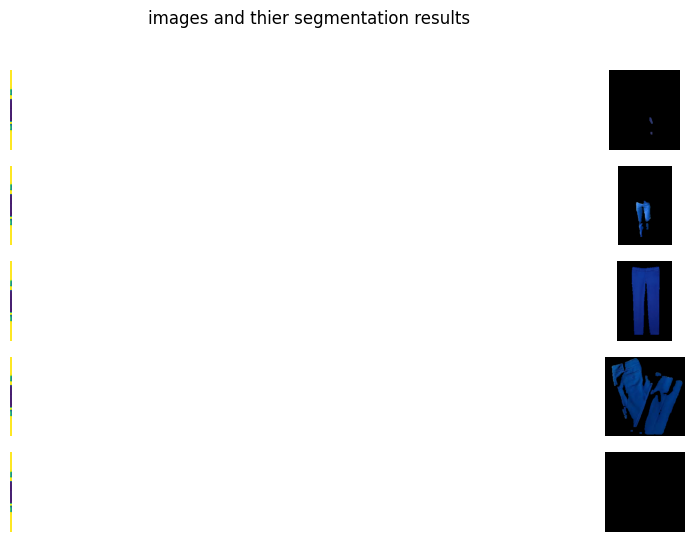

In [33]:
fig, ax = plt.subplots(5,2,figsize=(15,6))

for i in range(5):
    ax[i][0].imshow(img[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and thier segmentation results")
plt.show()

In [34]:
#exercise


In [35]:
#Q1
# Load the input image
input_image = cv.imread('images/boat.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

# Apply Otsu thresholding
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected regions (boat and people)
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(input_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the output image with bounding boxes
cv.imshow('Segmented Image', input_image)
cv.waitKey(0)
cv.destroyAllWindows()


In [36]:
#Q2
import tkinter as tk
from tkinter import filedialog

def apply_morphological_transformations(size):
    structuring_element = cv.getStructuringElement(cv.MORPH_RECT, (size, size))
    
    # Perform morphological transformations
    eroded_image = cv.erode(thresholded_image, structuring_element, iterations=1)
    dilated_image = cv.dilate(thresholded_image, structuring_element, iterations=1)
    opened_image = cv.morphologyEx(thresholded_image, cv.MORPH_OPEN, structuring_element)
    closed_image = cv.morphologyEx(thresholded_image, cv.MORPH_CLOSE, structuring_element)
    
    # Concatenate resulting images horizontally for display
    output_image = np.hstack((eroded_image, dilated_image, opened_image, closed_image))
    
    cv.imshow('Morphological Transformations', output_image)

def update_size(value):
    global current_size
    current_size = value
    apply_morphological_transformations(current_size)

def threshold_image(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return binary_image

# Load the image
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
image = cv.imread(file_path)

# Threshold the image to segment the leaf from the background
thresholded_image = threshold_image(image)

# Create a GUI window
cv.namedWindow('Morphological Transformations', cv.WINDOW_NORMAL)

# Create a trackbar to control the size of the structuring element
current_size = 1
max_size = 20
cv.createTrackbar('Size', 'Morphological Transformations', current_size, max_size, update_size)

# Show the initial morphological transformations result
apply_morphological_transformations(current_size)

cv.waitKey(0)
cv.destroyAllWindows()



error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [37]:
#Q3
def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image (RGB)
    color_low: HSV low
    color_high: HSV high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)

    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)

    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img_ori, img_ori, mask=mask)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)  # Corrected "appends" to "append"

# Define the HSV range for blue color (example values, you can adjust as per your requirement)
blue_low = np.array([100, 100, 100])
blue_high = np.array([120, 255, 255])

res = [color_seg(img, blue_low, blue_high) for img in imgs]


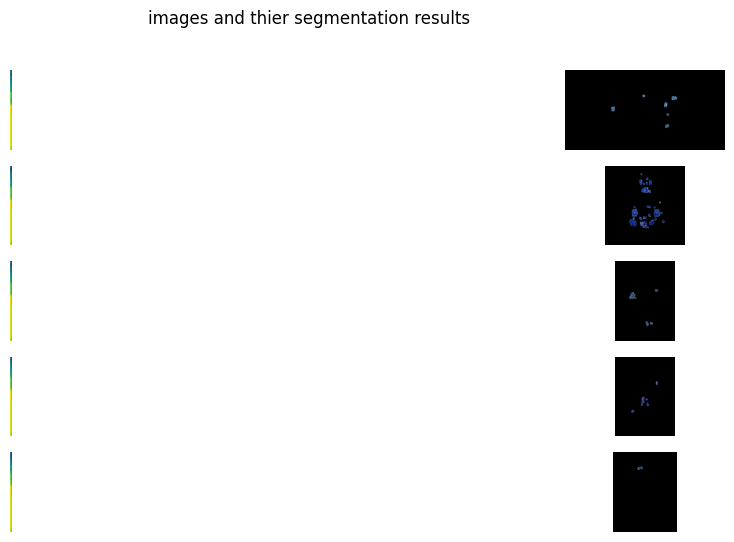

In [38]:
fig, ax = plt.subplots(5,2,figsize=(15,6))

for i in range(5):
    ax[i][0].imshow(img[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and thier segmentation results")
plt.show()